# Author: Husam Abdelrahim

## Assignment: Week 7

# Movie Ratings Analytical View With the use of Normalization and the Standardiaztion techniques

## Intro: 

This notebook that we are currently working with basically shows the dataset and the rating that comes with 5 different users and we will be explring with the idea of the raw ratings and how it can be transformed which will help us with our understanding of the user preferences and the movie popularity that we will be working 

## For this assignment I will be basically presenting on how to analzyze the rating with the idealogy of normalization and standardization techniques as well and present them and obviously of course show clear visualizations and insights

## The overvew of the dataset

Our data that we are going to be contain 5 users and those 5 users are (Khabib, Ronald, Demetrious, Zonica, and Kratos) and the for the 6 popular movies at least at the time of this assignment according to IMDB charts:

- The Gorge
- The Brutalist
- The Monkey
- Captain America: Brave New World
- Nosferatu
- Anora

Each of the user has basically rated the movie on a 1-5 scales and some of hte movies were yet to be rated so this would basically result in the ouput of a NaN in our values in the dataset that we are working with basically. 

In [21]:
import pandas as pd # we are going to use pandas to of course manipulate data and also it's required for this assignment
import matplotlib.pyplot as plt # we will use matplotlib to enchance our work and visualize the data


# Step 1: Setting up and getting the data to collect

For the first step what I will be doing is that I will be needed to create a necessary data structure to represent the movie rating that is coming from multiple users. Following this method we know that different people tend to rate movies different and it really comes personal prefernces and the rating styles as well. 

In [22]:
# The first step that I will have to take is basically 'list' my imagery friends and movies
people = ['Khabib', 'Ronald', 'Demetrious', 'Zonica', 'Kratos']
movies = ['The Gorge', 'The Brutalist', 'The Monkey', 'Captain America: Brave New World', 'Nosferatu', 'Anora'] # these are the six popular movies according to IMDB charts!

In [23]:
# Now it's time to create a dictionary and the reason for this is to basically store the rating that we have gathered 

data = {
    'User': people,
    'The Gorge': [5, 4, 5, 4, 5],
    'The Brutalist': [4, 5, 4, 5, 4],
    'The Monkey': [5, 5, 4, 4, 5],
    'Captain America: Brave New World': [5, 4, None, 5, 4],  # Demetrious has yet to watch this movie
    'Nosferatu': [3, None, 4, 3, 4],  # Ronald hasn't had the chance to watch this movie for them moment
    'Anora': [None, 4, 3, 4, 3]  # Khabib said he didn't wanted to bother watching this one
}

# now what we are going to do is loading this data in a dataframe as requested
ratings_df = pd.DataFrame(data)
ratings_df

,User,The Gorge,The Brutalist,The Monkey,Captain America: Brave New World,Nosferatu,Anora
0,Khabib,5,4,5,5.0,3.0,NaN
1,Ronald,4,5,5,4.0,NaN,4.0
2,Demetrious,5,4,4,NaN,4.0,3.0
3,Zonica,4,5,4,5.0,3.0,4.0
4,Kratos,5,4,5,4.0,4.0,3.0


# Step 2  : Analyzing the original  data of rating 

So now in this step, what I will be examing is what each person will basically accumlate too and calculating the average and this basically comes down to like the users and the movies, so understanding the the baseline with the metrics of course before applying any sory of transformations

Having these raw ratings will basically help us under the users behavior when it comes down to rating the movies and understanding which movie is usually a bit highter but this method of here will basically not account for individual rating biases. 



In [24]:
user_avg = []
for i in range(len(people)):
    # what is being occured here is that we are trying to accumalte all the rate for the person and after it's gonna skip the user column
    row = ratings_df.iloc[i, 1:]
    # now we are gonna get the avg (average) and add it to the list!
    
    avg = row.mean()
    user_avg.append(avg)

user_avg_df = pd.DataFrame({
    'User': people,
    'Average Rating': user_avg
})

print("User Averages:")
display(user_avg_df)  

# Now what we do have to do is calcualting the average for each of the movie that is provided

movie_avgs = []
for movie in movies:
    # now we are going to check just to see if hte movie is in the data
    if movie in ratings_df.columns:
        #now what is being occured here is getting all ratings for the movie
        col = ratings_df[movie] # accessing the column with the movie name!! 
        movie_avg = col.mean() # no we are going to calcuating and THEN append!
        movie_avgs.append(movie_avg)

movie_avg_df = pd.DataFrame({
    'Movie': movies,
    'Average Rating': movie_avgs
})

print("\nMovie Averages:")
display(movie_avg_df)


User Averages:


,User,Average Rating
0,Khabib,4.400000
1,Ronald,4.400000
2,Demetrious,4.000000
3,Zonica,4.166667
4,Kratos,4.166667



Movie Averages:


,Movie,Average Rating
0,The Gorge,4.6
1,The Brutalist,4.4
2,The Monkey,4.6
3,Captain America: Brave New World,4.5
4,Nosferatu,3.5
5,Anora,3.5


# Step 3 : Now we apply the normalization to the ratings method

So a normalization is able to covert a scale from 0 to 1, where:

- 0 would basically represent the lowest rating that was given

- 1 would basically represent the highest rating that was given to the user. 

Having this technique is basically will help us with addressing certain issue like where we could see if a user might give higher rating or lower rating, with normalziing it would be easier for us to process and compare the prefernences that do come from different users. 

In [25]:
def normalize_ratings(df):
    # so in this section what we are going to be doing is that we are going to create a copy
    result = df.copy()
    
    # Before we initiate to convert what we are going to do is csave the user colum
    user_column = result['User'].copy()
    
    # wea re going to converty to numeric column to float 64
    result = result.drop('User', axis=1).astype('float64')
    
    # in this section we will be going through each person
    for i in range(len(df)):
        #we will be getings the rating but skip the user column as presented
        ratings = df.iloc[i, 1:].dropna()
        
        # we are going now find the min and max ratings
        min_rating = ratings.min()
        max_rating = ratings.max()
        rating_range = max_rating - min_rating
        
        # now we are going to see if all the ratings are the same
        if rating_range == 0:
            # now if the rating are indeeed teh same we are going to set teh normalized value to 0.5
            for col in range(result.shape[1]):
                if not pd.isna(df.iloc[i, col+1]):  # +1 because we're going to be skipping the user in column DF
                    result.iloc[i, col] = 0.5
        
        else:
            # now it's time to normalize each of the rating
            for col in range(result.shape[1]):
                if not pd.isna(df.iloc[i, col+1]):  # +1 because we're going to be skipping the user in column DF
                    result.iloc[i, col] = (df.iloc[i, col+1] - min_rating) / rating_range
    
    # Adding the user column back
    result.insert(0, 'User', user_column)
    return result

normalized_df = normalize_ratings(ratings_df)
normalized_df

,User,The Gorge,The Brutalist,The Monkey,Captain America: Brave New World,Nosferatu,Anora
0,Khabib,1.0,0.5,1.0,1.0,0.0,NaN
1,Ronald,0.0,1.0,1.0,0.0,NaN,0.0
2,Demetrious,1.0,0.5,0.5,NaN,0.5,0.0
3,Zonica,0.5,1.0,0.5,1.0,0.0,0.5
4,Kratos,1.0,0.5,1.0,0.5,0.5,0.0


### Calculating a more normalized ratings avgs

Now what will be done is that we will try to calcualte the average of the normalized rating and we will apply this behavior for each of the user and each of the movie that is presented in this scenario and basically this will basically give us a better insight when it comes down to the preferences of the user and the the movie quality which basically accounts when it comes dowing to the indiviual rating. 

In [26]:
# so now we are going to calcualte avg normalized rating for each user in this scenario

norm_user_avg = []
for i in range(len(people)):
    row = normalized_df.iloc[i, 1:]
    avg = row.mean()
    norm_user_avg.append(avg)

norm_user_avg_df = pd.DataFrame({
    'User': people, 
    'Average Normalized Rating': norm_user_avg
})
print("Normalized User Averages:")
display(norm_user_avg_df)

# calculate avg the ratching for each movie that is being presnted for this scneario 

norm_movie_avgs = []
for movie in movies:
    if movie in normalized_df.columns:
        col = normalized_df[movie]
        avg = col.mean()
        norm_movie_avgs.append(avg)

norm_movie_avg_df = pd.DataFrame({
    'Movie': movies,
    'Average Normalized Rating': norm_movie_avgs
})
print("\nNormalized Movie Averages:")
display(norm_movie_avg_df)

Normalized User Averages:


,User,Average Normalized Rating
0,Khabib,0.700000
1,Ronald,0.400000
2,Demetrious,0.500000
3,Zonica,0.583333
4,Kratos,0.583333



Normalized Movie Averages:


,Movie,Average Normalized Rating
0,The Gorge,0.700
1,The Brutalist,0.700
2,The Monkey,0.800
3,Captain America: Brave New World,0.625
4,Nosferatu,0.250
5,Anora,0.125


# Step 4: Now we are going to applying the standardization to the ratings 

So now we know that the normlization scatles the rating to a fixed range that would basically mean 0-1, standardization what it usually does it that it converts the rating into the z-scores, it's able to show the stand deviations rating from a the user's "mean" rating 

A standardization basically have a few steps that could be pointed so here we go:

- Above 0 that would typically mean the user actually like their movie than their avg
- Below 0 would typically mean the same thing but they like the movie less their averige
- so the magnitudes indications bwould basially the rating would actually take a shift from a typical ratings. 

In [27]:
def standardize_ratings(df):
    # same as befor we are going to be making a copy
    result = df.copy()
    
    # Save the User column before converting
    user_column = result['User'].copy()
    
    # Convert only the numeric columns to float64
    result = result.drop('User', axis=1).astype('float64')
    
    # it's time for us to go through each person
    for i in range(len(df)):
        # what we are going to do here is get the ratings
        ratings = df.iloc[i, 1:].dropna()
        
        # we are going obtain the mean and the standard deviation that is presented
        mean_rating = ratings.mean()
        std_rating = ratings.std()
        
        # we are going to see if the ratings tends to be teh same
        if std_rating == 0:
            # if they are, we are going to set the standarized to 0
            for col in range(result.shape[1]):
                if not pd.isna(df.iloc[i, col+1]):  # +1 because we're skipping user column in the df
                    result.iloc[i, col] = 0
        else:
            # we are going to standarize for each rating that is presented
            for col in range(result.shape[1]):
                if not pd.isna(df.iloc[i, col+1]):  # +1 because we're skipping user column in the df
                    result.iloc[i, col] = (df.iloc[i, col+1] - mean_rating) / std_rating
    
    # Add the user column back 
    result.insert(0, 'User', user_column)
    return result

standardized_df = standardize_ratings(ratings_df)
standardized_df

,User,The Gorge,The Brutalist,The Monkey,Captain America: Brave New World,Nosferatu,Anora
0,Khabib,0.670820,-0.447214,0.670820,0.670820,-1.565248,NaN
1,Ronald,-0.730297,1.095445,1.095445,-0.730297,NaN,-0.730297
2,Demetrious,1.414214,0.000000,0.000000,NaN,0.000000,-1.414214
3,Zonica,-0.221404,1.107019,-0.221404,1.107019,-1.549826,-0.221404
4,Kratos,1.107019,-0.221404,1.107019,-0.221404,-0.221404,-1.549826


### Calcualting the rating averages - Standarized 

Now same as before what we are going to do is basically calculate standarized avg for each user presented and basically for each of the user and of course for the movie as well, this will basically give us another perspective on the preferences and will be counted for when it comes down to each of the user's rating 

In [28]:
# we are now going to calcualte the standarized avg for each user
std_user_avg = []
for i in range(len(people)):
    row = standardized_df.iloc[i, 1:]
    avg = row.mean()
    std_user_avg.append(avg)

std_user_avg_df = pd.DataFrame({
    'User': people,
    'Average Standardized Rating': std_user_avg
})
print("Standardized User Averages:")
display(std_user_avg_df)

# we are now going to calcualte the standarized avg for each movie that is presented 
std_movie_avgs = []
for movie in movies:
    if movie in standardized_df.columns:
        col = standardized_df[movie]
        avg = col.mean()
        std_movie_avgs.append(avg)

std_movie_avg_df = pd.DataFrame({
    'Movie': movies,
    'Average Standardized Rating': std_movie_avgs
})
print("\nStandardized Movie Averages:")
display(std_movie_avg_df)

Standardized User Averages:


,User,Average Standardized Rating
0,Khabib,-4.440892e-16
1,Ronald,-5.773160e-16
2,Demetrious,0.000000e+00
3,Zonica,-4.117077e-16
4,Kratos,-4.070818e-16



Standardized Movie Averages:


,Movie,Average Standardized Rating
0,The Gorge,0.448070
1,The Brutalist,0.306769
2,The Monkey,0.530376
3,Captain America: Brave New World,0.206535
4,Nosferatu,-0.834119
5,Anora,-0.978935


# Step 5: We are now going to present the visualization for the ratings 

So when we visualize our data it's gonna help us to have a better idea of the pattern that is being presented at hand, and it's gonna help us understand how often movies were rated and help us understand with the consistently. 

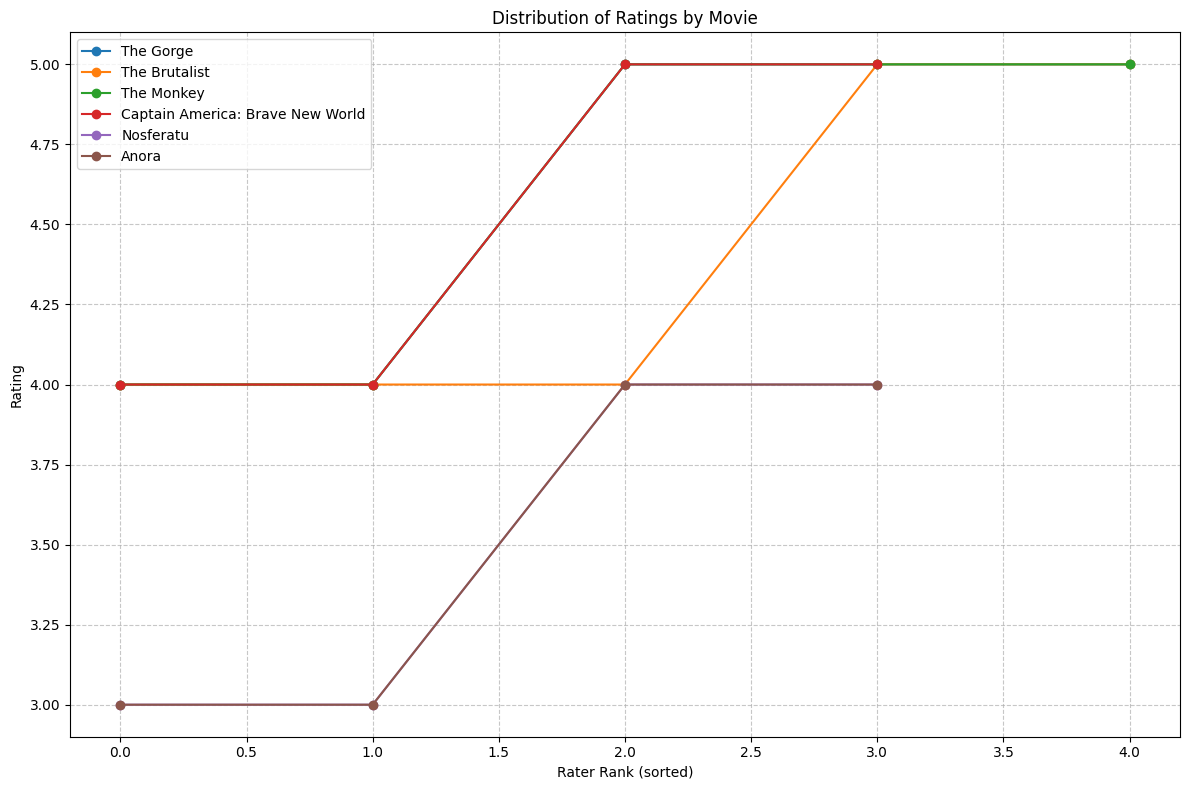

In [29]:
# we are going to be setting up three visuals 
plt.figure(figsize=(12, 8))

for j, movie in enumerate(movies):
    if movie in ratings_df.columns:
        # we are going to be getting the valid rating for the movie and show it on the data
        movie_ratings = ratings_df[movie].dropna().values
        plt.plot(range(len(movie_ratings)), sorted(movie_ratings), 'o-', label=movie)

plt.xlabel('Rater Rank (sorted)')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Movie')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

# Conclusion - The Advantages and The Disadvantges of Normalization and Standarization

## Advantages of utilizing a more Normalized Ratings:

1. There would be unifrom scales and having a unifrom scales for all othe rating which is the 0-1, it really makes the comparision a lot mroe easier and to digest especially when we are comparing across users with different ratings
2. The second would have to be a relative prefernces, And a relative preferneces is basically preserves that prefernces with each of the users rating
3. Next we have the different scale the way it handles and basicalles it this would accomadate to users that are using the rating scale which like I have demostarted earlier we see users with 3-5 scales and other utilize the full 1-5 scales
4. Lastly we notice how the vales are easily interpretable into percetanting when it comes down to the rating. 

# Now let's focus on the DISADVANTAGES of Normalized ratings:

1. We notice that the absoulte of the rating values are currently lost and this is very crucial because we can use those data or any other data in some sort of context later on.
2. With having only a narrowed rating ranges like w can see the 4-5 scores being presented what have change the rating score
3. What could be courred with the outlier is that it can complress the rest of the normalized values that is presented
4. This is very limited usage and if the user just rated only one movie that we can't use any range to normalize

# Same scenario but now e fous on the Advantages of Sandardized Ratings!:

1. Using a sandarized rating system is really good especially when you want to have a deeper analysis of the user behavior and how they would interact with the rating system. 
2. It usually good to when it comes down to expressing the rating system especially with the standard deviations from the users rating (mean), it displays how unusal rating for that user could be
3. When it comes down to seeing a signficance with statistics it has a better chance at captruing statsistical sigificance and the rating differnece
4. This method is usually less affected by outliers than the normalization method that is provided 

# Disadvantages of Standardized Ratings: 

Just like the normalization there are some ways where it has its cons when it comes down to the use.  

1. Starting off it's actually less intuitive to get the message across while having a normalized rating is easier to get the message across
2. This method can't be used if the user doesn't have any sort of variations when it comes down to the ratings (standard deviation presented is 0)
3. If the rates tend to follow a certain normal distribution, it may come out as flase
4. It becomes difficult when trying to compare the statistics or the results that was gathred to the original ratings. 

# Application in our data set

In our movie data set that is being presented 

- ***Khabib*** what he does is that he tends to have a habit of rating movies very high overall (we see an avg rating of 4.4) so with the ability of normalization this is actually going to help us alout with adjust the personal rating scale, and after utilizing this method we get a better idea of his perfrences
- ***Sandardization*** Basically gets to reveal which movies each user has truly rated above or below their own indiviual avg (average) that is being presented. As we see here with Demetrious's sandardized rating it cleary show on what movie he valued the most compared to his own average.
- Now for the movie like that recently came out called the ***The Gorge***, which really had high raw score that was being presented, utliizng a standardized rating has aided in this sense where we can see the differences and how many a certain indiviual really valued the product compared to the other movies that they possibly interactied with
- As we can see based on the rating. The movie ***Nosferatu*** appears to be rated much lower (avg is 3.5) but then we see people like Demetrious, it was really rated well on a personal rating scale.

Overall, the recommended systems, standardized could work better because one it shows their true value and we get a better understand of the user's preferences. Like for example we have a guy like Khabib and Ronald both have rate a movie as their top highest movie, so this info is actually gathered in a standardized format, even though Khabib would probably just give a 5 while ronald only gives it 4. As you can see though the visualization that is provided is actually shows that pattern effectively 

In [30]:
# Save the data to CSV files
ratings_df.to_csv('movie_ratings.csv', index=False)
normalized_df.to_csv('normalized_movie_ratings.csv', index=False)
standardized_df.to_csv('standardized_movie_ratings.csv', index=False)

print("Data analysis complete. Results saved to CSV files.")

Data analysis complete. Results saved to CSV files.
